## Build a random forest classifier to predict the risk of heart disease based on a dataset of patient information. The dataset contains 303 instances with 14 features, including age, sex, chest pain type, resting blood pressure, serum cholesterol, and maximum heart rate achieved.
Dataset link: https://drive.google.com/file/d/1bGoIE4Z2kG5nyh-fGZAJ7LH0ki3UfmSJ/view?usp=share_link

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns

In [2]:
df=pd.read_csv('dataset.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## Q1. Preprocess the dataset by handling missing values, encoding categorical variables, and scaling the numerical features if necessary.

In [3]:
## checking For missing values
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

No Encoding is required as all dataypes are already in numerical format also random forest does not require feature scaling

## Q2. Split the dataset into a training set (70%) and a test set (30%).

In [5]:
### segreate the independent and dependent features
X=df.drop(labels=['target'],axis=1)
y=df['target']

In [6]:
from sklearn.model_selection import  train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=42)

In [8]:
X_train.shape

(212, 13)

## Q3. Train a random forest classifier on the training set using 100 trees and a maximum depth of 10 for each tree. Use the default values for other hyperparameters.

In [9]:
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier(n_estimators=100,max_depth=10)
classifier.fit(X_train,y_train)

RandomForestClassifier(max_depth=10)

## Q4. Evaluate the performance of the model on the test set using accuracy, precision, recall, and F1 score.

In [10]:
y_pred=classifier.predict(X_test)

In [15]:
from sklearn.metrics import precision_score,accuracy_score,classification_report,recall_score,f1_score

In [31]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
def evaluate_model(x,y,model):
    ypred = model.predict(x)
    acc = accuracy_score(y,ypred)
    pre = precision_score(y,ypred)
    rec = recall_score(y,ypred)
    f1 = f1_score(y,ypred)
    print(f'Accuracy Score  : {acc:.4f}')
    print(f'Precision Score : {pre:.4f}')
    print(f'Recall Score    : {rec:.4f}')
    print(f'F1 Score        : {f1:.4f}')
    return acc, pre, rec, f1

In [33]:

# Evaluate model on test data
acc_base, pre_base, rec_base, f1_base = evaluate_model(X_test, y_test, classifier)

Accuracy Score  : 0.8242
Precision Score : 0.8400
Recall Score    : 0.8400
F1 Score        : 0.8400


## Q5. Use the feature importance scores to identify the top 5 most important features in predicting heart disease risk. Visualise the feature importances using a bar chart.

In [19]:
classifier.feature_importances_

array([0.09093959, 0.02836461, 0.11714319, 0.07013937, 0.06961392,
       0.00898165, 0.02003514, 0.11075099, 0.06096479, 0.09562065,
       0.06266216, 0.15956174, 0.10522221])

In [20]:
classifier.feature_names_in_

array(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
       'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal'], dtype=object)

In [21]:
imp = pd.Series(classifier.feature_importances_)
imp.index = classifier.feature_names_in_
imp = imp.sort_values(ascending=False)
imp

ca          0.159562
cp          0.117143
thalach     0.110751
thal        0.105222
oldpeak     0.095621
age         0.090940
trestbps    0.070139
chol        0.069614
slope       0.062662
exang       0.060965
sex         0.028365
restecg     0.020035
fbs         0.008982
dtype: float64

In [22]:
top5 = list(imp[0:5].index)
print(f'Top 5 features in the data are : {top5}')

Top 5 features in the data are : ['ca', 'cp', 'thalach', 'thal', 'oldpeak']


<AxesSubplot: title={'center': 'Feature Importances Plot'}>

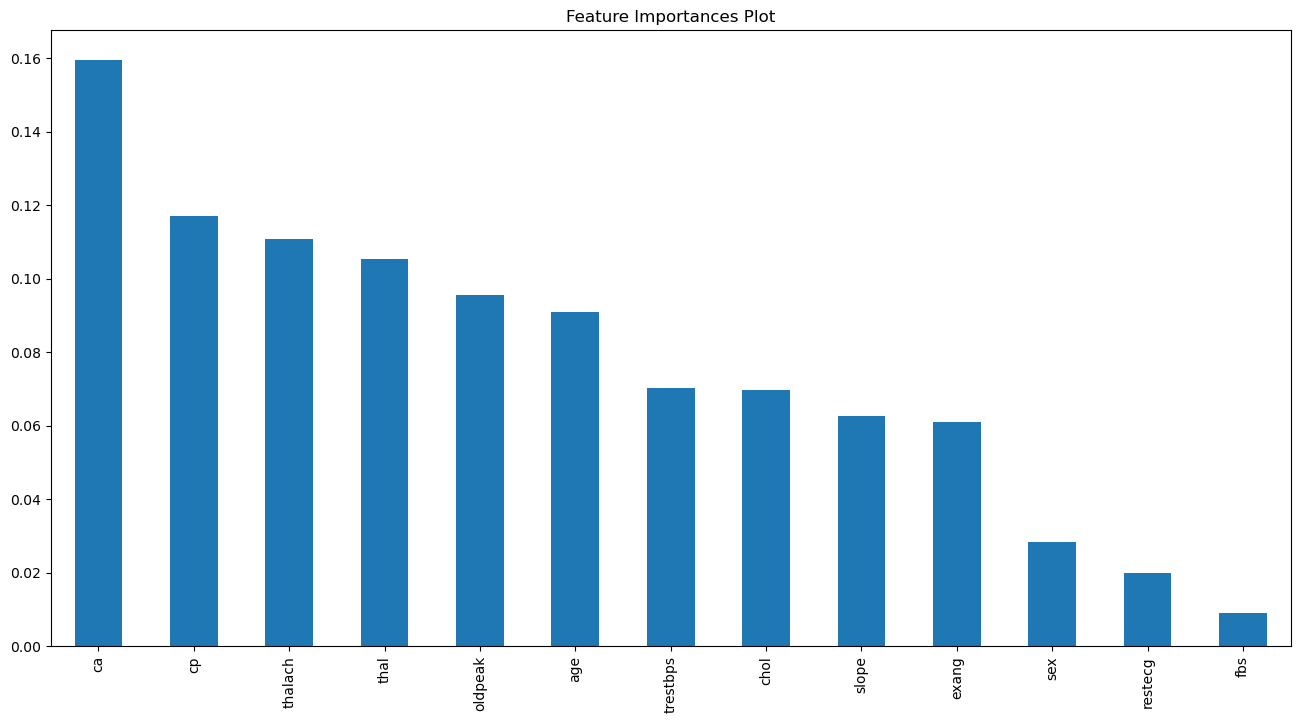

In [23]:
imp.plot(kind='bar',title='Feature Importances Plot', figsize=(16,8))

## Q6. Tune the hyperparameters of the random forest classifier using grid search or random search. Try different values of the number of trees, maximum depth, minimum samples split, and minimum samples leaf. Use 5-fold cross-validation to evaluate the performance of each set of hyperparameters.

In [24]:
# Defining the parameters for tuning
parameters = {
    'n_estimators':[10,50,100,200,300,400],
    'max_depth':[4,5,6,7,8,9,10],
    'min_samples_leaf':[2,3,4,5,6],
    'min_samples_split':[2,5,10]
}


In [25]:
# Performing Randomized Search CV
from sklearn.model_selection import RandomizedSearchCV
rscv = RandomizedSearchCV(RandomForestClassifier(),
                          param_distributions=parameters,
                          cv=5, 
                          scoring='f1',
                          n_iter=50,
                          verbose=3)

In [26]:

rscv.fit(X_train,y_train.values.flatten())

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV 1/5] END max_depth=4, min_samples_leaf=6, min_samples_split=10, n_estimators=10;, score=0.913 total time=   0.0s
[CV 2/5] END max_depth=4, min_samples_leaf=6, min_samples_split=10, n_estimators=10;, score=0.870 total time=   0.0s
[CV 3/5] END max_depth=4, min_samples_leaf=6, min_samples_split=10, n_estimators=10;, score=0.717 total time=   0.0s
[CV 4/5] END max_depth=4, min_samples_leaf=6, min_samples_split=10, n_estimators=10;, score=0.875 total time=   0.0s
[CV 5/5] END max_depth=4, min_samples_leaf=6, min_samples_split=10, n_estimators=10;, score=0.800 total time=   0.0s
[CV 1/5] END max_depth=6, min_samples_leaf=2, min_samples_split=2, n_estimators=10;, score=0.857 total time=   0.0s
[CV 2/5] END max_depth=6, min_samples_leaf=2, min_samples_split=2, n_estimators=10;, score=0.851 total time=   0.0s
[CV 3/5] END max_depth=6, min_samples_leaf=2, min_samples_split=2, n_estimators=10;, score=0.769 total time=   0.0s
[CV 4

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=50,
                   param_distributions={'max_depth': [4, 5, 6, 7, 8, 9, 10],
                                        'min_samples_leaf': [2, 3, 4, 5, 6],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [10, 50, 100, 200, 300,
                                                         400]},
                   scoring='f1', verbose=3)

In [27]:
rscv.best_score_

0.8556917286579363

## Q7. Report the best set of hyperparameters found by the search and the corresponding performance metrics. Compare the performance of the tuned model with the default model.

In [28]:
rscv.best_params_

{'n_estimators': 50,
 'min_samples_split': 10,
 'min_samples_leaf': 5,
 'max_depth': 5}

In [29]:
# Best Estimator (Model)
rscv.best_estimator_

RandomForestClassifier(max_depth=5, min_samples_leaf=5, min_samples_split=10,
                       n_estimators=50)

In [34]:
# Testing Accuracy on tuned model
print('Results for Tuned Model :\n')
acc_tuned, pre_tuned , rec_tuned, f1_tuned = evaluate_model(X_test,y_test.values.flatten(),rscv)

Results for Tuned Model :

Accuracy Score  : 0.8352
Precision Score : 0.8302
Recall Score    : 0.8800
F1 Score        : 0.8544


In [37]:
dct = {
    'metrics':['accuracy','precision','recall','f1'],
    'base model':[acc_base,pre_base,rec_base,f1_base],
    'tuned model':[acc_tuned,pre_tuned,rec_tuned,f1_tuned]
}

In [38]:
df_compare = pd.DataFrame(dct)
df_compare

,metrics,base model,tuned model
0,accuracy,0.824176,0.835165
1,precision,0.840000,0.830189
2,recall,0.840000,0.880000
3,f1,0.840000,0.854369


## Q8. Interpret the model by analysing the decision boundaries of the random forest classifier. Plot the decision boundaries on a scatter plot of two of the most important features. Discuss the insights and limitations of the model for predicting heart disease risk.

In [39]:
best_rfc = rscv.best_estimator_
best_rfc

RandomForestClassifier(max_depth=5, min_samples_leaf=5, min_samples_split=10,
                       n_estimators=50)

In [40]:
imp_tuned = best_rfc.feature_importances_
imp_tuned = pd.Series(imp_tuned)
imp_tuned.index = best_rfc.feature_names_in_
imp_tuned = imp_tuned.sort_values(ascending=False)
imp_tuned

thal        0.172157
ca          0.154911
cp          0.140340
oldpeak     0.136190
exang       0.090693
thalach     0.090031
slope       0.061875
age         0.043331
trestbps    0.038509
chol        0.031992
sex         0.027284
restecg     0.008410
fbs         0.004276
dtype: float64

In [41]:
imp_tuned[0:2]

thal    0.172157
ca      0.154911
dtype: float64

<AxesSubplot: title={'center': 'Feature Importances for tuned model'}>

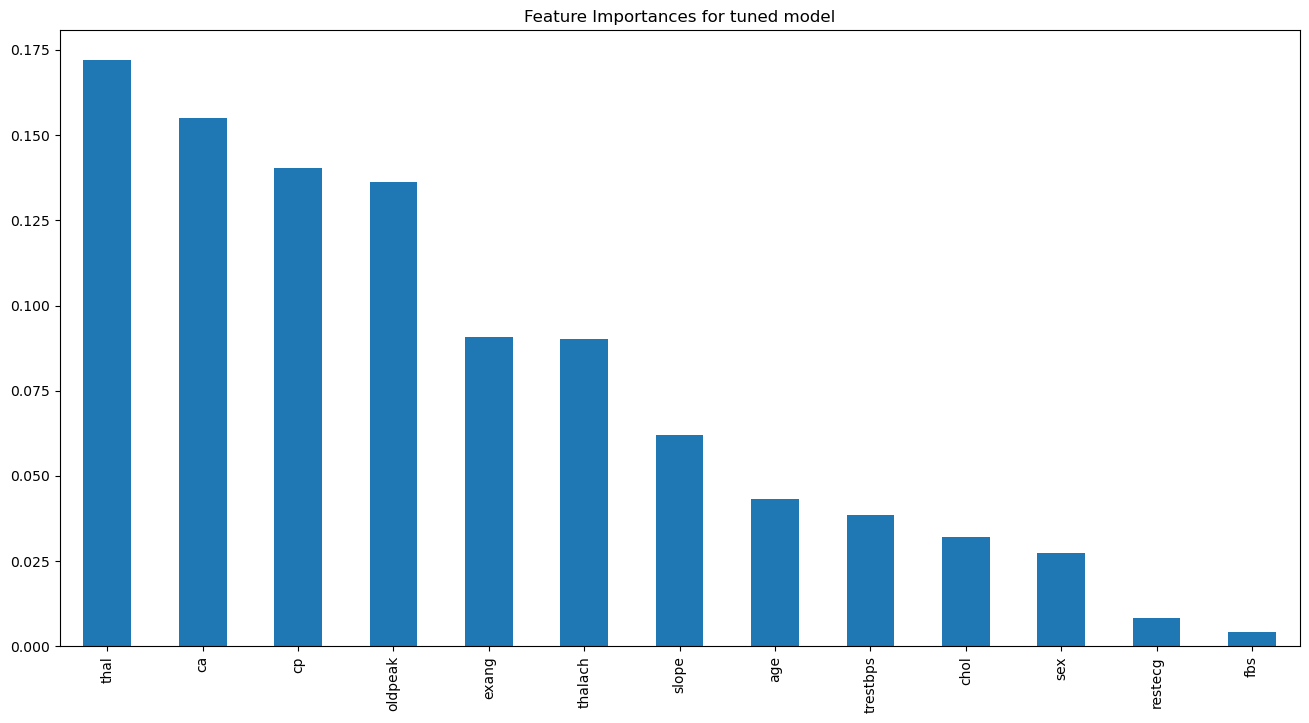

In [42]:
imp_tuned.plot(kind='bar',title='Feature Importances for tuned model',figsize=(16,8))

In [43]:
top2 = X_train[['ca','cp']]
top2.head()

,ca,cp
124,0,2
72,0,1
15,0,2
10,0,0
163,4,2


In [44]:
df_top2 =pd.concat([top2,y_train],axis=1)
df_top2.head()

,ca,cp,target
124,0,2,1
72,0,1,1
15,0,2,1
10,0,0,1
163,4,2,1


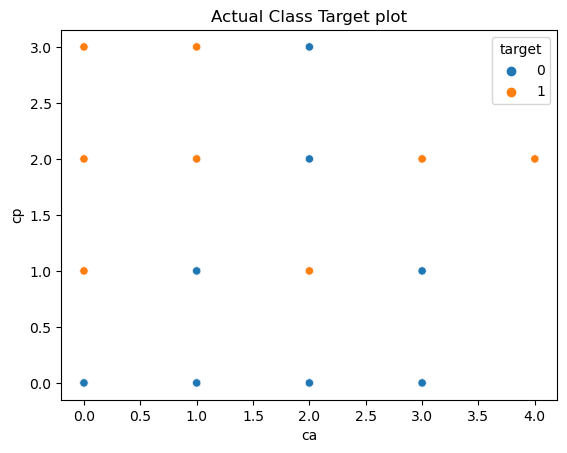

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.scatterplot(data=df_top2,x='ca',y='cp',hue='target')
plt.title('Actual Class Target plot')
plt.show()

In [46]:
df_top2['predicted'] = best_rfc.predict(X_train)

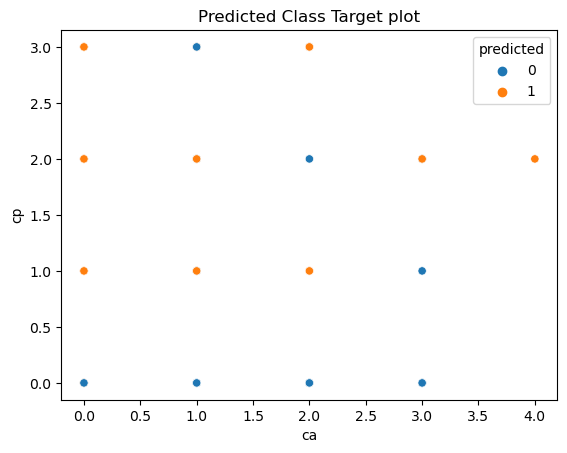

In [47]:
sns.scatterplot(data=df_top2,x='ca',y='cp',hue='predicted')
plt.title('Predicted Class Target plot')
plt.show()